<a href="https://colab.research.google.com/github/Icon82/Tesi01/blob/main/Data_Source/EstrTas90_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    year  height         tas
0   1990     2.0  286.693970
1   1991     2.0  285.527466
2   1992     2.0  286.379028
3   1993     2.0  286.370117
4   1994     2.0  286.594360
5   1995     2.0  285.751099
6   1996     2.0  285.759644
7   1997     2.0  286.214294
8   1998     2.0  286.263824
9   1999     2.0  286.852448
10  2000     2.0  287.035431
11  2001     2.0  286.810547
12  2002     2.0  287.110962
13  2003     2.0  286.791962
14  2004     2.0  286.292999
15  2005     2.0  287.192993
16  2006     2.0  286.279053
17  2007     2.0  287.286560
18  2008     2.0  287.092682
19  2009     2.0  287.858826
20  2010     2.0  286.995361
21  2011     2.0  287.027893
22  2012     2.0  286.986786
23  2013     2.0  287.535645
24  2014     2.0  287.385376


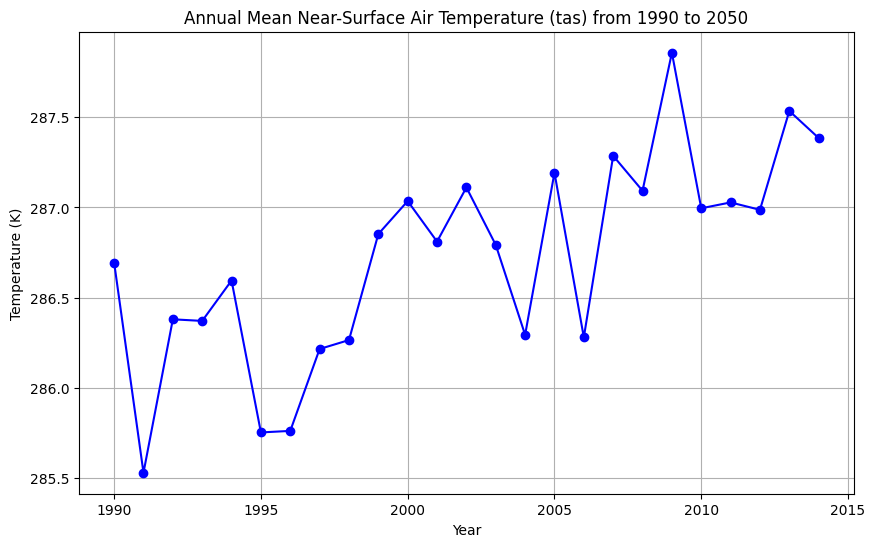

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset NetCDF
file_path = '/content/drive/My Drive/Colab Notebooks/tas_Amon_CNRM-ESM2-1_historical_r1i1p1f2_gr_185001-201412.nc'
ds = xr.open_dataset(file_path)

# Seleziona il periodo dal 1990 al 2050
start_year = 1990
end_year = 2014
time_range = slice(f'{start_year}-01-01', f'{end_year}-12-31')

# Seleziona il range di latitudini e longitudini
lat_range = slice(36.1286, 52.3731)
# Combinazione delle longitudini 350-360 e 0-28
lon_range_1 = slice(350.8630, 360)
lon_range_2 = slice(0, 28.9759)

# Filtra il dataset per il periodo e le coordinate specificate
tas_filtered_time = ds.tas.sel(time=time_range)
tas_filtered_lat_lon_1 = tas_filtered_time.sel(lat=lat_range, lon=lon_range_1)
tas_filtered_lat_lon_2 = tas_filtered_time.sel(lat=lat_range, lon=lon_range_2)

# Unisce i due filtri di longitudine
tas_filtered = xr.concat([tas_filtered_lat_lon_1, tas_filtered_lat_lon_2], dim='lon')

# Calcola la media annua per ogni anno
tas_annual_mean = tas_filtered.groupby('time.year').mean(dim=['time', 'lat', 'lon'])

# Converti i risultati in un DataFrame Pandas per una visualizzazione più semplice
tas_annual_mean_df = tas_annual_mean.to_dataframe().reset_index()
print(tas_annual_mean_df)
csv_file_path = 'tas_annual_mean_1990_2014.csv'
tas_annual_mean_df.to_csv(csv_file_path, index=False)
# Plotta le medie annue
plt.figure(figsize=(10, 6))
plt.plot(tas_annual_mean_df['year'], tas_annual_mean_df['tas'], marker='o', linestyle='-', color='b')
plt.title('Annual Mean Near-Surface Air Temperature (tas) from 1990 to 2050')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()
plt.show()